# Distributions of nodes and edges in Custom KG and OpenBioLink KG

This notebook plots the distributions of nodes and edges in the Custom KG and OpenBioLink KG.

In [1]:
import os
import getpass
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from utils import KG_DATA_PATH, create_graph_from_df

# Load networks

In [2]:
custom = pd.read_csv(
    os.path.join(KG_DATA_PATH, 'custom_filtered_kg.tsv'), 
    sep='\t'
)

openbiolink = pd.read_csv(
    os.path.join(KG_DATA_PATH, 'openbiolink_filtered_kg.tsv'),
    sep='\t'
)

In [3]:
custom_graph = create_graph_from_df(custom)
openbiolink_graph = create_graph_from_df(openbiolink)

Report on the number of relations: {1: 43578, -1: 8045}
Report on the number of relations: {-1: 12477, 1: 29022}


# Get nodes in Custom KG

In [4]:
custom_drugs = set()
custom_proteins = set()
custom_diseases = set()

for node in custom_graph.nodes():
    if node.startswith('pubchem.compound:'):
        custom_drugs.add(node)
    elif node.startswith('ncbigene:'):
        custom_proteins.add(node)
    elif node.startswith('mondo:'):
        custom_diseases.add(node)

### Get edges in custom network 

In [5]:
drug_protein_custom = 0
protein_protein_custom = 0
protein_disease_custom = 0

for source, target in custom_graph.edges():
    if 'pubchem.compound' in source and 'ncbigene' in target:
        drug_protein_custom += 1
    elif 'ncbigene' in source and 'ncbigene' in target:
        protein_protein_custom += 1
    elif 'ncbigene' in source and 'mondo' in target:
        protein_disease_custom += 1

## Summary stats

In [6]:
print('##### Number of nodes in Custom kg #####')
print(f'{len(custom_graph.nodes())}: total # of nodes')
print(f'{len(custom_drugs)}: # of unique drugs')
print(f'{len(custom_proteins)}: # of unique proteins')
print(f'{len(custom_diseases)}: # of unique diseases')

print('\n##### Number of edges in Custom kg ######')       
print(f'{len(custom_graph.edges())}: total # of interactions')
print(f'{drug_protein_custom}: # of drug-protein interactions')
print(f'{protein_protein_custom}: # of protein-protein interactions')
print(f'{protein_disease_custom}: # of protein-disease interactions')

##### Number of nodes in Custom kg #####
8489: total # of nodes
218: # of unique drugs
8228: # of unique proteins
43: # of unique diseases

##### Number of edges in Custom kg ######
51617: total # of interactions
743: # of drug-protein interactions
50651: # of protein-protein interactions
223: # of protein-disease interactions


# Get nodes in OpenBioLink KG

In [7]:
openbiolink_drugs = set()
openbiolink_proteins = set()
openbiolink_diseases = set()

for node in openbiolink_graph.nodes():
    if node.startswith('pubchem.compound:'):
        openbiolink_drugs.add(node)
    elif node.startswith('ncbigene:'):
        openbiolink_proteins.add(node)
    elif node.startswith('mondo:'):
        openbiolink_diseases.add(node)

# Get edges in OpenBioLink network

In [8]:
drug_protein_openbio = 0
protein_protein_openbio = 0
protein_disease_openbio = 0

for source, target in openbiolink_graph.edges():
    if 'pubchem.compound' in source and 'ncbigene' in target:
        drug_protein_openbio += 1
    elif 'ncbigene' in source and 'ncbigene' in target:
        protein_protein_openbio += 1
    elif 'ncbigene' in source and 'mondo' in target:
        protein_disease_openbio += 1

## Summary stats

In [9]:
print('##### Number of nodes in OpenBioLink KG #####')
print(f'{len(openbiolink_graph.nodes())}: total # of nodes')
print(f'{len(openbiolink_diseases)}: # of unique diseases')
print(f'{len(openbiolink_drugs)}: # of unique drugs')
print(f'{len(openbiolink_proteins)}: # of unique proteins \n')

print('##### Number of edges in OpenBioLink KG #####')
print(f'{len(openbiolink_graph.edges())}: total # of edges')
print(f'{drug_protein_openbio}: # of drug-protein interactions')
print(f'{protein_protein_openbio}: # of protein-protein interactions')
print(f'{protein_disease_openbio}: # of protein-disease interactions')

##### Number of nodes in OpenBioLink KG #####
4831: total # of nodes
20: # of unique diseases
209: # of unique drugs
4602: # of unique proteins 

##### Number of edges in OpenBioLink KG #####
41474: total # of edges
3399: # of drug-protein interactions
38019: # of protein-protein interactions
56: # of protein-disease interactions


# Plot distributions of nodes

In [10]:
data_nodes = {
    'Network': [
        'Custom KG',
        'OpenBioLink KG',
        'Custom KG',
        'OpenBioLink KG',
        'Custom KG',
        'OpenBioLink KG'
    ],
    'Count':[
        len(custom_drugs),
        len(openbiolink_drugs), 
        len(custom_proteins), 
        len(openbiolink_proteins), 
        len(custom_diseases), 
        len(openbiolink_diseases)
    ],
    'Node Types':['Drugs','Drugs','Genes/Proteins','Genes/Proteins','Diseases','Diseases']
}

node_df = pd.DataFrame(data=data_nodes)

In [11]:
data_edges = {
    'Network': [
        'Custom KG',
        'OpenBioLink KG',
        'Custom KG',
        'OpenBioLink KG',
        'Custom KG',
        'OpenBioLink KG'
    ],
    'Count':[
        drug_protein_custom,
        drug_protein_openbio, 
        protein_protein_custom,
        protein_protein_openbio,
        protein_disease_custom, 
        protein_disease_openbio
    ],
    'Edge Types':[
        'drug-protein',
        'drug-protein',
        'protein-protein',
        'protein-protein',
        'protein-disease',
        'protein-disease'
    ]
}

edges_df = pd.DataFrame(data=data_edges)

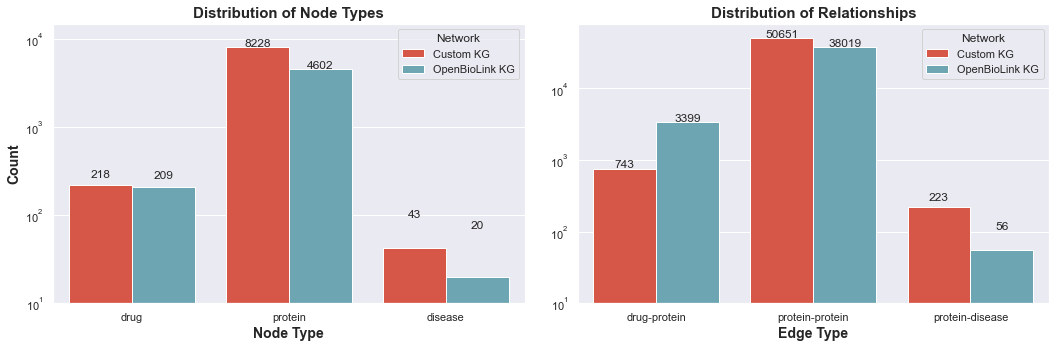

In [12]:
sns.set(rc={'figure.figsize':(15,5)})
f, axis = plt.subplots(1, 2, figsize=(15,5))

# grid lines
sns.set_style("darkgrid")

bx = sns.barplot(x="Node Types", y="Count", hue='Network', data=node_df, palette=['#EE442F','#63ACBE'], ax=axis[0]) 
bx = sns.barplot(x="Edge Types", y="Count", hue='Network', data=edges_df, palette=['#EE442F','#63ACBE'], ax=axis[1]) 

# title
axis[0].set_title(
    'Distribution of Node Types', 
    fontsize=15, 
    fontweight="bold"
)
axis[1].set_title(
    'Distribution of Relationships', 
    fontsize=15, 
    fontweight="bold"
)

# axis labels
axis[0].set_xlabel("Node Type", fontsize=14, fontweight="bold")
axis[0].set_ylabel("Count", fontsize=14, fontweight="bold")
axis[1].set_xlabel("Edge Type", fontsize=14, fontweight="bold")
axis[1].set_ylabel("")   
    
# axis ticks
axis[0].set_xticklabels(labels=['drug', 'protein', 'disease'])
axis[1].set_xticklabels(labels=['drug-protein','protein-protein','protein-disease'])

# limit
axis[0].set_ylim(10, 15000)
axis[1].set_ylim(10, 80000)

# Add counts above bars
for p in axis[0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 50
    value = int(p.get_height())
    axis[0].text(_x, _y, value, ha="center")
    

for p in axis[1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 50
    value = int(p.get_height())
    axis[1].text(_x, _y, value, ha="center")   


plt.tight_layout()
axis[0].set_yscale("log") #the log transformation
axis[1].set_yscale("log") #the log transformation

plt.savefig(
    ('graph-stats.png'),
    dpi=400,
    bbox_inches='tight', 
)
plt.show()
    
    